# Example using a standalone SOBOL sequence generator

Functions and Classes:
- SobolIterator: A class from the BO_Iterator module that generates a sequence of parameters using the Sobol method.
- SyntheticGaussian: A class from the BO_Iterator module that defines a synthetic Gaussian objective function.

Main Steps:
1. Define the objective function using SyntheticGaussian with specified centers, sigma, and number of samples.
2. Initialize the SobolIterator with parameter names, bounds, number of Sobol samples, and the objective function.
3. Iterate over the generated parameter sets, evaluate the objective function for each set, and record the results.
4. Retrieve all recorded data from the iterator.
5. Plot the Sobol parameters against the observed objective values using a scatter plot with a color bar indicating the objective values.

In [1]:
from BO_Iterator import SobolIterator, SyntheticGaussian

# Define the optimization parameters
param_names = ["x0", "x1"]
param_bounds = [(0, 1), (0, 1)]

# Define the objective function
objective_function = SyntheticGaussian(centers=[0.5, 0.5], sigma=0.1, n_samples=1).read

# Initialize the Sobol Iterator
iterator = SobolIterator(
    param_names=param_names,
    param_bounds=param_bounds,
    n_sobol=1e5,  # Number of Sobol samples
    objective_function=objective_function,  # Objective function to evaluate
    threshold=0.9995,  # Stopping threshold
    maximize=True,  # Whether to maximize or minimize
)

# Run the optimization loop
trial = 0
for param_dict in iterator:
    objective = iterator.evaluate_objective(param_dict)
    trial += 1

# Retrieve the best parameters and value from the iterator
best_result = {"params": iterator.best_params, "value": iterator.best_value}

# Retrieve all recorded data
data = iterator.get_all_data()

# Display results
print("Best Result:", best_result)


Stopping early: threshold exceeded.
Best Result: {'params': {'x0': 0.501622200012207, 'x1': 0.49938875436782837}, 'value': 0.9998497535830009}


In [2]:
best_result

{'params': {'x0': 0.501622200012207, 'x1': 0.49938875436782837},
 'value': 0.9998497535830009}

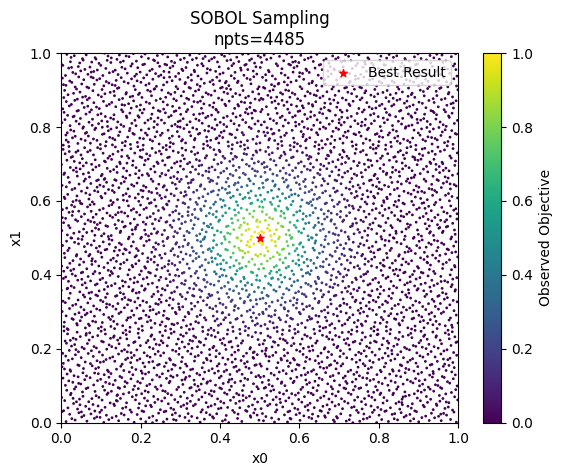

In [3]:
import matplotlib.pyplot as plt
import numpy as np

param_names = iterator.param_names
sobol_params = np.array([[d[name] for name in param_names] for d in data['params']])
observed_objective = [obj[0] for obj in data['results']]

scatter = plt.scatter(sobol_params[:,0], sobol_params[:,1], c=observed_objective, s=1)
best_scatter = plt.scatter(best_result["params"]["x0"], best_result["params"]["x1"], c='red', s=30, label='Best Result', marker='*')
cbar = plt.colorbar(scatter)
cbar.set_label('Observed Objective')

plt.xlabel('x0')
plt.ylabel('x1')
plt.title(f'SOBOL Sampling\nnpts={trial-1}')

plt.xlim(param_bounds[0][0], param_bounds[0][1])
plt.ylim(param_bounds[1][0], param_bounds[1][1])
scatter.set_clim(0, 1)
plt.legend(loc='upper right')

plt.show()